<a href="https://colab.research.google.com/github/201ssc/python_test1/blob/main/3_5_2_%EB%B3%91%ED%95%A9_%EA%B5%B0%EC%A7%91.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 540 kB 5.3 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=3ba50b15f4c269a896102cebecbb568043847fec2ab29feaa6b7f50d2e7befcf
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn
import matplotlib

from sklearn.model_selection import train_test_split

from sklearn.datasets import load_breast_cancer
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.datasets import load_digits

from sklearn.preprocessing import QuantileTransformer, StandardScaler, PowerTransformer


import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.set(font_scale=3)
sns.set(rc = {'figure.figsize':(12,8)})

from pandas.core.common import random_state

# 3.5.2 병합군집
병합 군집은 다음과 같다.
병합 군집은 시작할때 각 포인트를 하나의 클러스터로 지정하고, 그다음 어떤 종료조건을 만족할 때가지 가장 비슷한 두 클러스터를 합쳐나간다. 종료조건은 지정된 클러스터가 남을 때 가지이다.

- ward
- average
- complete

ward 기본값, 대부분에 데이터셋에 알맞음
avg, cop 는 한 클러스터가 다른 것보다 매우 클 때 더 나을 수 있다.

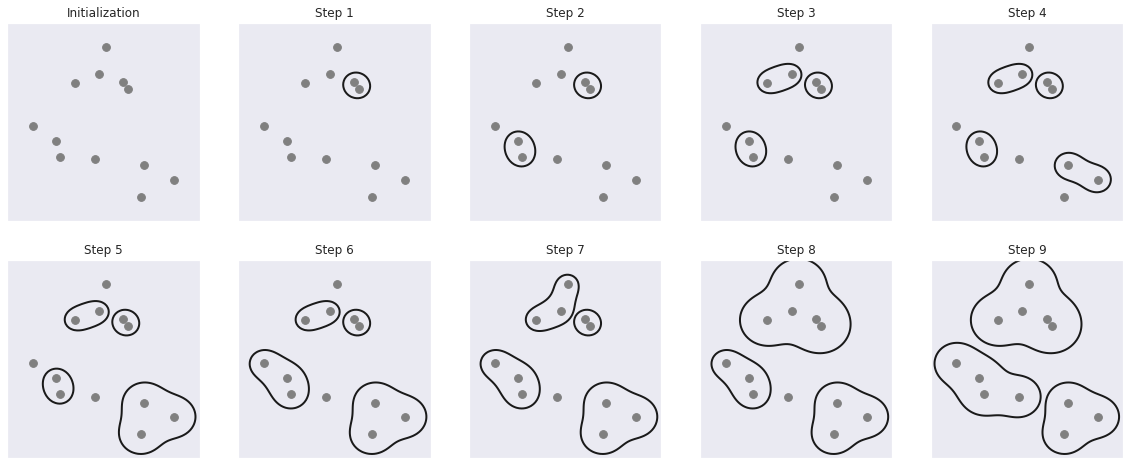

In [3]:
mglearn.plots.plot_agglomerative_algorithm()

Text(0, 0.5, 'feature 1')

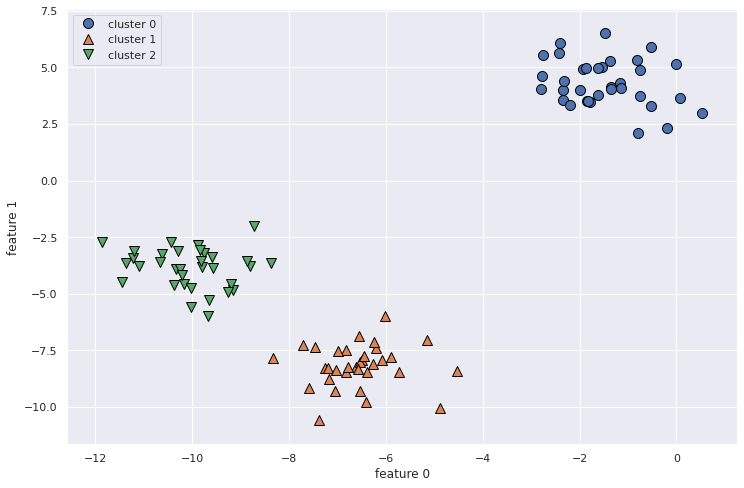

In [5]:
from sklearn.cluster import AgglomerativeClustering
X, y = make_blobs(random_state=1)
agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X)

mglearn.discrete_scatter(X[:, 0], X[:,1], assignment)
plt.legend(['cluster 0','cluster 1','cluster 2'], loc='best')
plt.xlabel('feature 0')
plt.ylabel('feature 1')

계층적 군집과 덴드로그램
병합군집은 계층적 군집을 만든다. 다음은 각 클러스터가 더 작은 클러스터로 어떻게 나뉘는지 잘 보여준다.

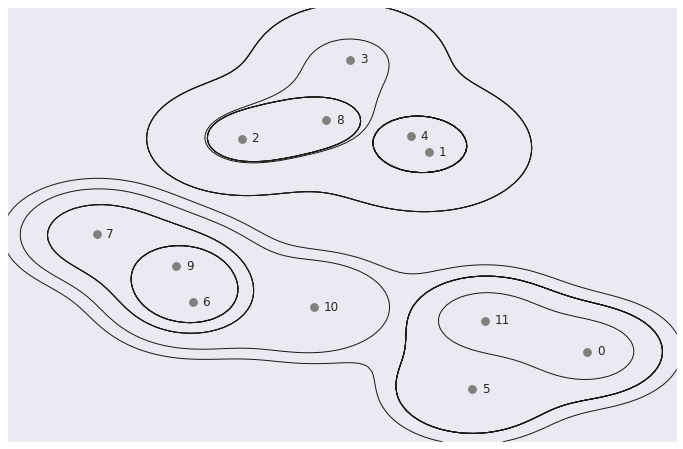

In [6]:
mglearn.plots.plot_agglomerative()

2차원 이상의 계층군집을 시각화하는 건 scikit-learn에서 아직 구연되지 않았다. 
그러나 Scipy 알고리즘은, 덴드로그램 그래프를 그려보여줄 수 있다.

Text(0, 0.5, 'cluster distence')

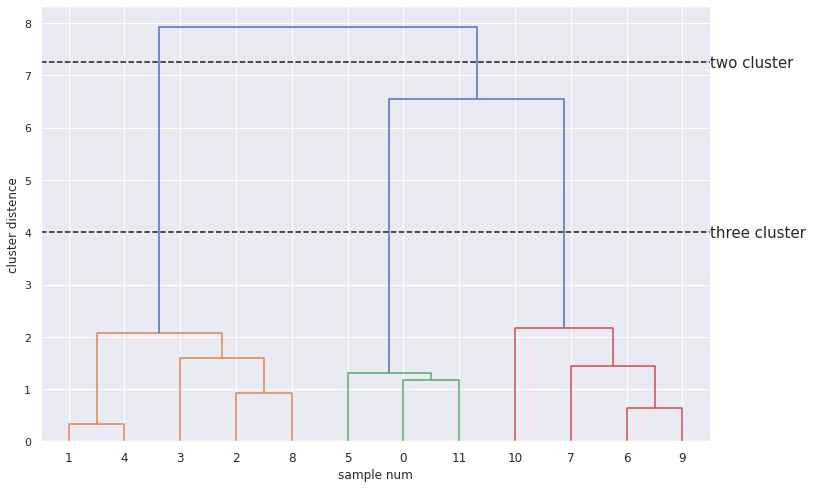

In [10]:
# SciPy에서 ward 군집 함수와 덴드로그램 함수를 임포트한다.
from scipy.cluster.hierarchy import dendrogram, ward
X, y = make_blobs(random_state=0, n_samples=12)
# 데이터 배열 X에 ward 함수를 적용한다.
# SciPy의 ward 함수는 병합 군집을 수행할 때 생성된 거리 정보가 답긴 배열을 반환한다.
linkage_array = ward(X)
# 덴드로그램을 그린다.
dendrogram(linkage_array)

# 두 개와 세개의 클러스터를 구분하는 커트라인을 표시한다.
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')

ax.text(bounds[1], 7.25, 'two cluster', va='center', fontdict={'size':15})
ax.text(bounds[1], 4, 'three cluster', va='center', fontdict={'size':15})
plt.xlabel('sample num')
plt.ylabel('cluster distence')

scikit 0.24 버전에서 덴드로그램 함수를 그릴수 있게 되었다. 

In [11]:
agg = AgglomerativeClustering(n_clusters=None, distance_threshold=0)
agg.fit(X)

print(agg.children_)

[[ 1  4]
 [ 6  9]
 [ 2  8]
 [ 0 11]
 [ 5 15]
 [ 7 13]
 [ 3 14]
 [12 18]
 [10 17]
 [16 20]
 [19 21]]


Text(0, 0.5, 'cluster distence')

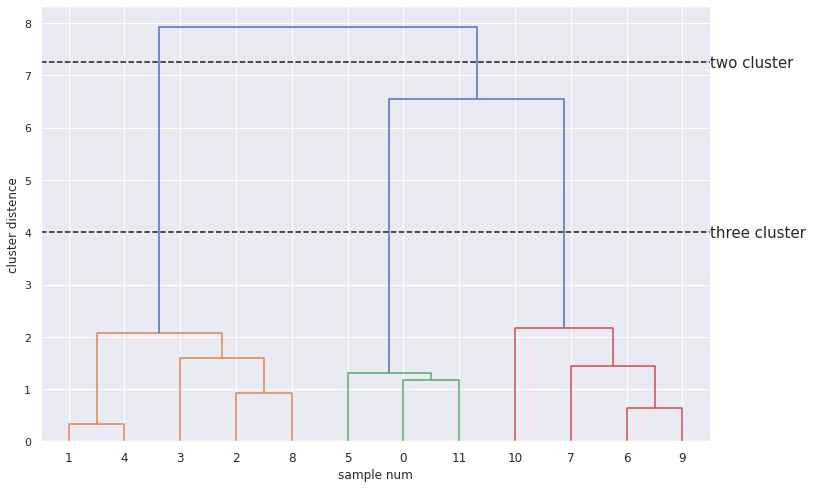

In [13]:
counts = np.zeros(agg.children_.shape[0])
n_samples = len(agg.labels_)
for i, merge in enumerate(agg.children_):
  current_count = 0
  for child_idx in merge:
    if child_idx < n_samples:
      current_count += 1 # 리프 노트
    else:
      current_count += counts[child_idx - n_samples]
    counts[i] = current_count

linkage_matrix = np.column_stack([agg.children_, agg.distances_, counts])
# 클러스터 간의 거리 정보가 담긴 linkage matrix를 사용해 덴드로그램을 그린다.
dendrogram(linkage_matrix)

# 두 개와 세 개의 클러스터를 구분하는 커트라인을 표시한다.
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')

ax.text(bounds[1], 7.25, 'two cluster', va='center', fontdict={'size':15})
ax.text(bounds[1], 4, 'three cluster', va='center', fontdict={'size':15})
plt.xlabel('sample num')
plt.ylabel('cluster distence')